In [1]:
import pandas as pd

In [31]:
df = pd.read_csv('cases_clean_project 4.csv')

In [38]:
df.columns

Index(['caseid', 'subjectid', 'Surgery Duration', 'Hospitalization',
       'casestart', 'caseend', 'opstart', 'opend', 'adm', 'dis', 'age', 'sex',
       'height', 'weight', 'bmi', 'department', 'optype', 'dx', 'opname',
       'preop_htn', 'preop_dm', 'intraop_ebl', 'intraop_uo', 'intraop_rbc',
       'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf',
       'intraop_mdz', 'intraop_ftn', 'intraop_rocu', 'intraop_vecu',
       'intraop_eph', 'intraop_phe', 'intraop_epi', 'intraop_ca', 'opdur_mins',
       'hospstay_mins', 'hosp_no_surgery_mins', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'is_cancer'],
      dtype='object')

In [35]:
# drop NaN values in 'optype'
df = df.dropna(subset=['optype', 'dx'])

# occurrences of each surgery type
surgery_counts = df['optype'].value_counts()

cancer_keywords = ["cancer", "carcinoma", "malignant", "blastoma",
                   "tumor", "neoplasm", "sarcoma", "glioma"
                   "lymphoma", "leukemia", "melanoma", "mesothelioma",
                   "myeloma", "teratoma"]

# optype proportions
surgery_proportions = surgery_counts / surgery_counts.sum()

# add 'is_cancer' col to identify cancer diagnoses
# with condition to exclude diagnoses explicitly labeled as benign
df['is_cancer'] = (
    df['dx'].astype(str).str.contains('|'.join(cancer_keywords), case=False, na=False) &
    ~df['dx'].astype(str).str.contains('benign', case=False, na=False))

In [37]:
df[df['is_cancer'] == True].shape[0]

3370

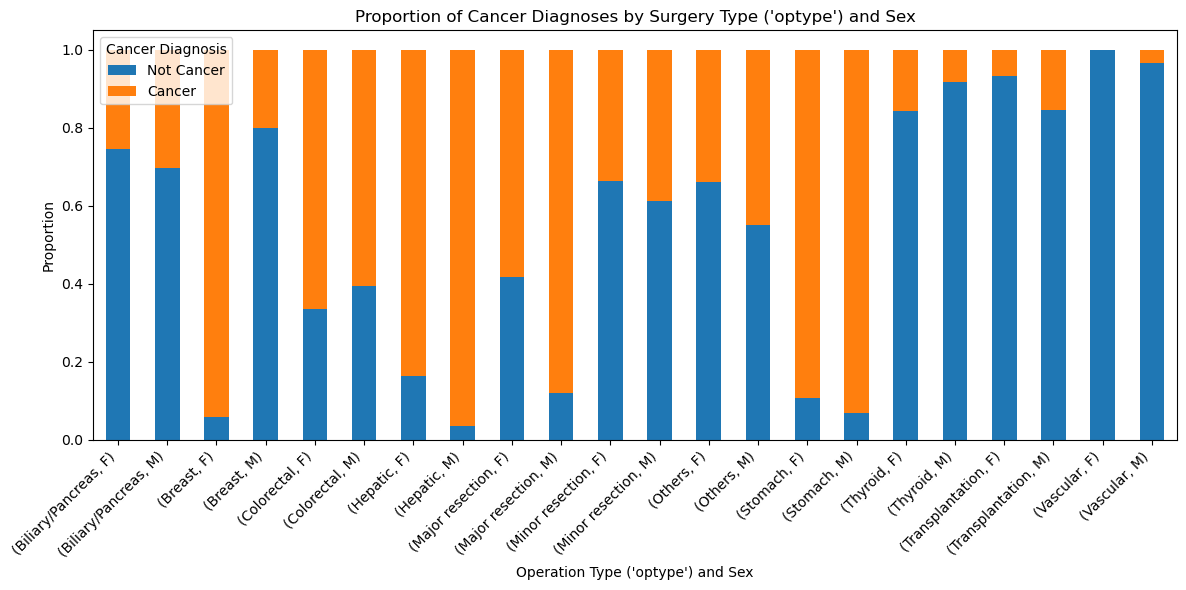

In [ ]:
import matplotlib.pyplot as plt

# number of cases per optype and sex
cancer_counts = df.groupby(['optype', 'sex'])['is_cancer'].value_counts(normalize=True).unstack()

# stacked bar chart
ax = cancer_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Proportion of Cancer Diagnoses by Surgery Type ('optype') and Sex")
plt.xlabel("Operation Type ('optype') and Sex")
plt.ylabel("Proportion")
plt.legend(title="Cancer Diagnosis", labels=["Not Cancer", "Cancer"])
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()
